In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình

In [ ]:
# đọc dữ liệu từ file csv
df = pd.read_csv('/content/drive/MyDrive/FPT1.csv')

# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

            Ngày  Đóng cửa    Mở cửa  Cao nhất Thấp nhất
0     21/07/2023  73,500.0  72,500.0  75,000.0  72,400.0
1     20/07/2023  72,700.0  72,600.0  72,900.0  72,300.0
2     19/07/2023  72,600.0  72,500.0  73,000.0  72,400.0
3     18/07/2023  72,400.0  72,500.0  72,600.0  72,200.0
4     17/07/2023  72,300.0  73,000.0  73,600.0  72,200.0
...          ...       ...       ...       ...       ...
2500  16/07/2013  96,528.0  95,139.0  97,222.0  95,139.0
2501  15/07/2013  95,139.0  95,139.0  95,833.0  94,444.0
2502  12/07/2013  95,139.0  94,444.0  95,139.0  93,750.0
2503  11/07/2013  94,444.0  94,444.0  95,139.0  93,750.0
2504  10/07/2013  94,444.0  95,139.0  95,833.0  94,444.0

[2505 rows x 5 columns]


In [ ]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [ ]:
#kích thước dữ liệu
df.shape

(2505, 5)

In [ ]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ngày       2505 non-null   datetime64[ns]
 1   Đóng cửa   2505 non-null   object        
 2   Mở cửa     2505 non-null   object        
 3   Cao nhất   2505 non-null   object        
 4   Thấp nhất  2505 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 98.0+ KB


In [ ]:
#mô tả bộ dữ liệu
df.describe()

<ipython-input-18-36b00b1f613d>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


Ngày  Đóng cửa    Mở cửa  Cao nhất Thấp nhất
count                  2505      2505      2505      2505      2505
unique                 2505      1250      1223      1300      1271
top     2023-07-21 00:00:00  96,528.0  97,222.0  98,611.0  96,528.0
freq                      1        34        33        34        42
first   2013-07-10 00:00:00       NaN       NaN       NaN       NaN
last    2023-07-21 00:00:00       NaN       NaN       NaN       NaN

#Tiền xử lý dữ liệu

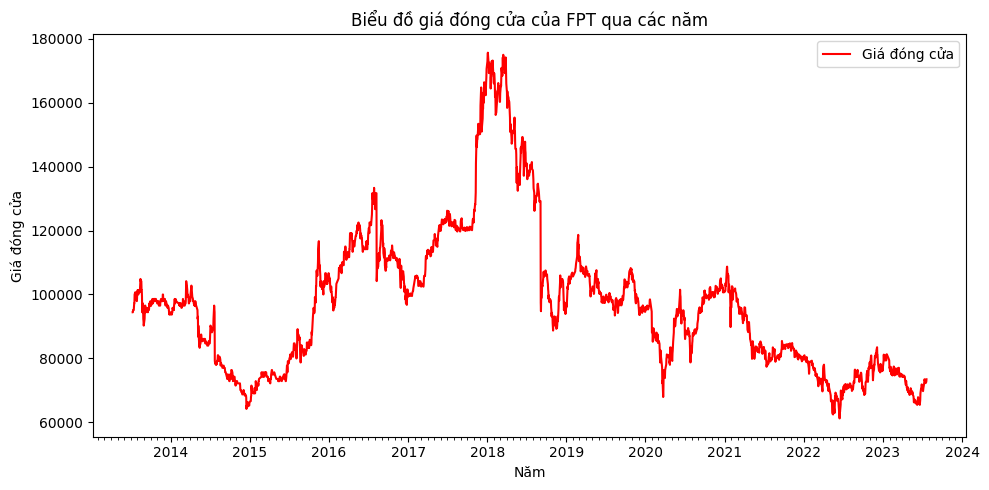

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của FPT qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

In [ ]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

Đóng cửa
Ngày                
2013-07-10   94444.0
2013-07-11   94444.0
2013-07-12   95139.0
2013-07-15   95139.0
2013-07-16   96528.0
...              ...
2023-07-17   72300.0
2023-07-18   72400.0
2023-07-19   72600.0
2023-07-20   72700.0
2023-07-21   73500.0

[2505 rows x 1 columns]

In [ ]:
#chia tập dữ liệu
data = df1.values
train_data = data[:1500]
test_data = data[1500:]

In [ ]:
data

array([[94444.],
       [94444.],
       [95139.],
       ...,
       [72600.],
       [72700.],
       [73500.]])

In [ ]:
#chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [ ]:
#tạo vòng lặp các giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) #lấy 50 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [ ]:
x_train

[array([0.29027738, 0.29027738, 0.29635691, 0.29635691, 0.30850724,
        0.31457803, 0.31457803, 0.33887869, 0.34494948, 0.34494948,
        0.32672836, 0.33279915, 0.33887869, 0.32065757, 0.32672836,
        0.34494948, 0.34494948, 0.35102902, 0.33887869, 0.35102902,
        0.34494948, 0.34494948, 0.34494948, 0.34494948, 0.35709981,
        0.36925013, 0.38140046, 0.37532967, 0.37532967, 0.35102902,
        0.35102902, 0.33279915, 0.29027738, 0.31457803, 0.30850724,
        0.27205626, 0.26598547, 0.25383514, 0.27205626, 0.29027738,
        0.30850724, 0.30850724, 0.29027738, 0.3024277 , 0.3024277 ,
        0.29635691, 0.3024277 , 0.29635691, 0.29635691, 0.29027738]),
 array([0.29027738, 0.29635691, 0.29635691, 0.30850724, 0.31457803,
        0.31457803, 0.33887869, 0.34494948, 0.34494948, 0.32672836,
        0.33279915, 0.33887869, 0.32065757, 0.32672836, 0.34494948,
        0.34494948, 0.35102902, 0.33887869, 0.35102902, 0.34494948,
        0.34494948, 0.34494948, 0.34494948, 0.

In [ ]:
y_train

[0.2963569134842401,
 0.30242770379791795,
 0.2963569134842401,
 0.30242770379791795,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.32065756981190174,
 0.30850724164807086,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.3267283601255797,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756

In [ ]:
#xếp dữ liệu thành mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

#Xây dựng và huấn luyện mô hình

In [ ]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp LSTM
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')

In [ ]:
#huấn luyện mô hình
save_model = "/content/drive/MyDrive/dataset/save_model.hdf5"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.08281, saving model to /content/drive/MyDrive/dataset/save_model.hdf5
29/29 - 8s - loss: 0.0828 - 8s/epoch - 279ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.08281 to 0.05254, saving model to /content/drive/MyDrive/dataset/save_model.hdf5
29/29 - 5s - loss: 0.0525 - 5s/epoch - 183ms/step
Epoch 3/100

Epoch 3: loss improved from 0.05254 to 0.05000, saving model to /content/drive/MyDrive/dataset/save_model.hdf5
29/29 - 5s - loss: 0.0500 - 5s/epoch - 162ms/step
Epoch 4/100

Epoch 4: loss did not improve from 0.05000
29/29 - 3s - loss: 0.0525 - 3s/epoch - 107ms/step
Epoch 5/100

Epoch 5: loss did not improve from 0.05000
29/29 - 3s - loss: 0.0510 - 3s/epoch - 107ms/step
Epoch 6/100

Epoch 6: loss improved from 0.05000 to 0.04768, saving model to /content/drive/MyDrive/dataset/save_model.hdf5
29/29 - 4s - loss: 0.0477 - 4s/epoch - 141ms/step
Epoch 7/100

Epoch 7: loss did not improve from 0.04768
29/29 - 6s - loss: 0.0492 - 6s/epoch - 201ms/step
Epoch 8/100

Epoch 8: loss improved from 0.04768 to 0.04335, saving model to /content/drive/MyDrive/dataset/save_model.hdf5
29/29 - 4s - loss: 0.0433 - 4s/epoch - 132ms/ste

In [ ]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("/content/drive/MyDrive/dataset/save_model.hdf5")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

46/46 [==============================] - 2s 34ms/step


In [ ]:
 #xử lý dữ liệu test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test = data[1500:] #giá thực
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) #giá dự đoán

32/32 [==============================] - 1s 32ms/step


#Độ chính xác của mô hình

<ipython-input-33-4f5867c1eb90>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
<ipython-input-33-4f5867c1eb90>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu


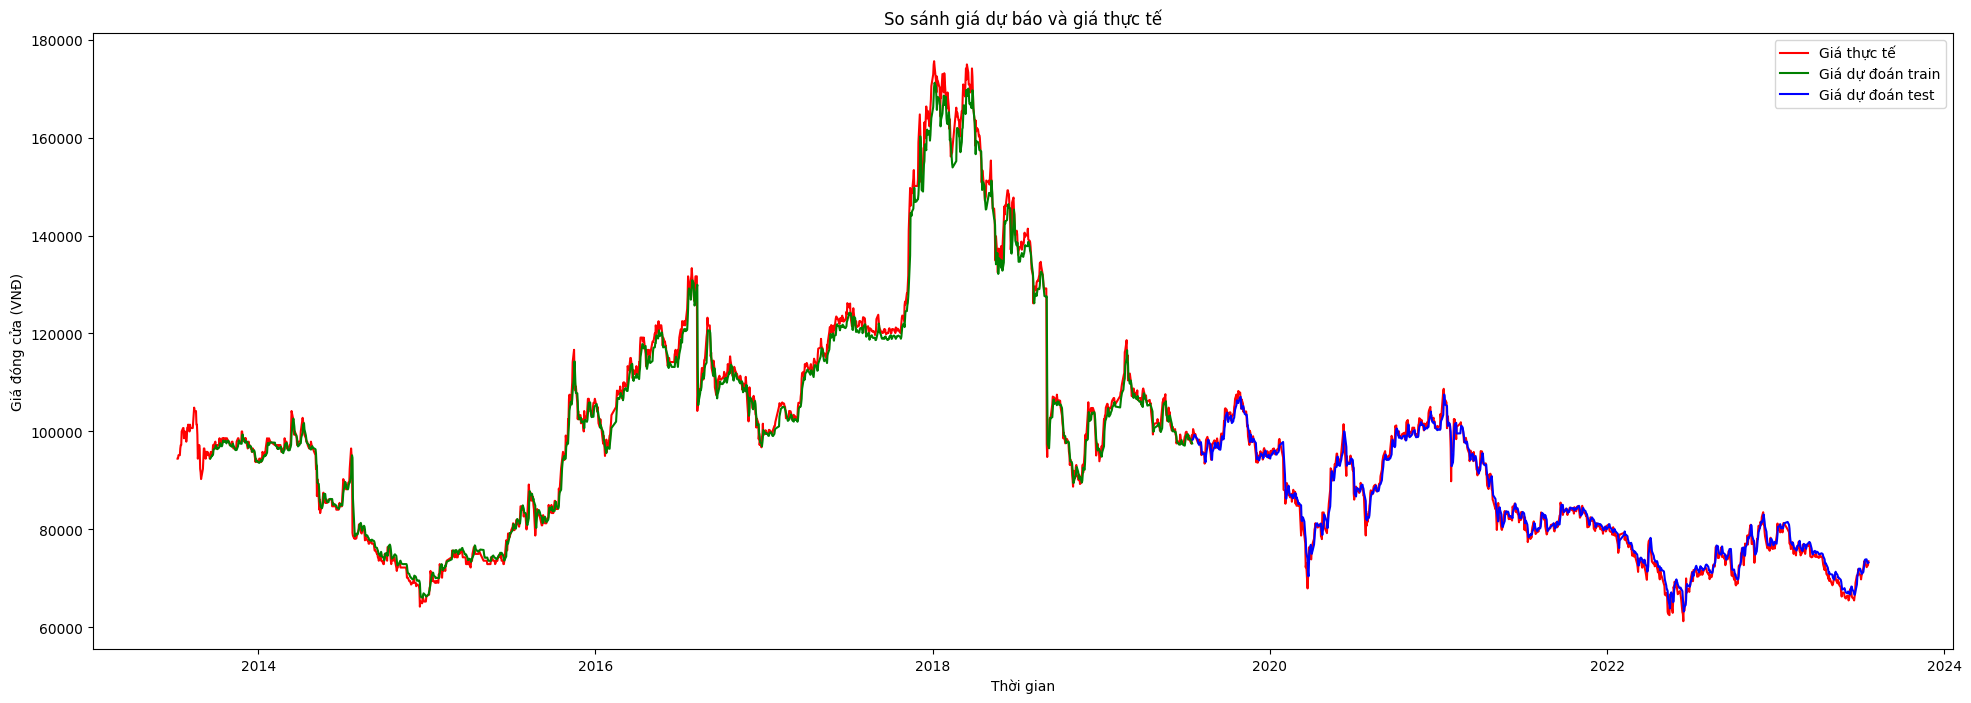

In [ ]:
#lập biểu đồ so sánh
train_data1 = df1[50:1500]
test_data1 = df1[1500:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [ ]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict))
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

Độ phù hợp tập train: 0.9897802609618449
Sai số tuyệt đối trung bình trên tập train (VNĐ): 1581.665317887931
Phần trăm sai số tuyệt đối trung bình tập train: 0.014267710392489997


In [ ]:
train_data1

Đóng cửa       Dự đoán
Ngày                              
2013-09-19   95139.0  94468.937500
2013-09-20   95833.0  94600.484375
2013-09-23   95139.0  95160.335938
2013-09-24   95833.0  95103.484375
2013-09-25   97222.0  95307.109375
...              ...           ...
2019-07-11   99133.0  98434.062500
2019-07-12   98183.0  98605.179688
2019-07-15   97549.0  98162.765625
2019-07-16   98183.0  97500.953125
2019-07-17   99291.0  97541.023438

[1450 rows x 2 columns]

In [ ]:
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_test_predict))
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

Độ phù hợp tập test: 0.9822270023587585
Sai số tuyệt đối trung bình trên tập test (VNĐ): 1130.2718268034826
Phần trăm sai số tuyệt đối trung bình tập test: 0.013774212412109375


In [ ]:
test_data1

Đóng cửa       Dự đoán
Ngày                              
2019-07-18   98658.0  98323.585938
2019-07-19  100479.0  98441.710938
2019-07-22   99371.0  99328.656250
2019-07-23   99291.0  99257.062500
2019-07-24   99450.0  98968.789062
...              ...           ...
2023-07-17   72300.0  73892.968750
2023-07-18   72400.0  73422.773438
2023-07-19   72600.0  73121.906250
2023-07-20   72700.0  73126.929688
2023-07-21   73500.0  73251.281250

[1005 rows x 2 columns]

#Dự đoán giá tương lai và so sánh với giá ngày cuối

1/1 [==============================] - 0s 36ms/step


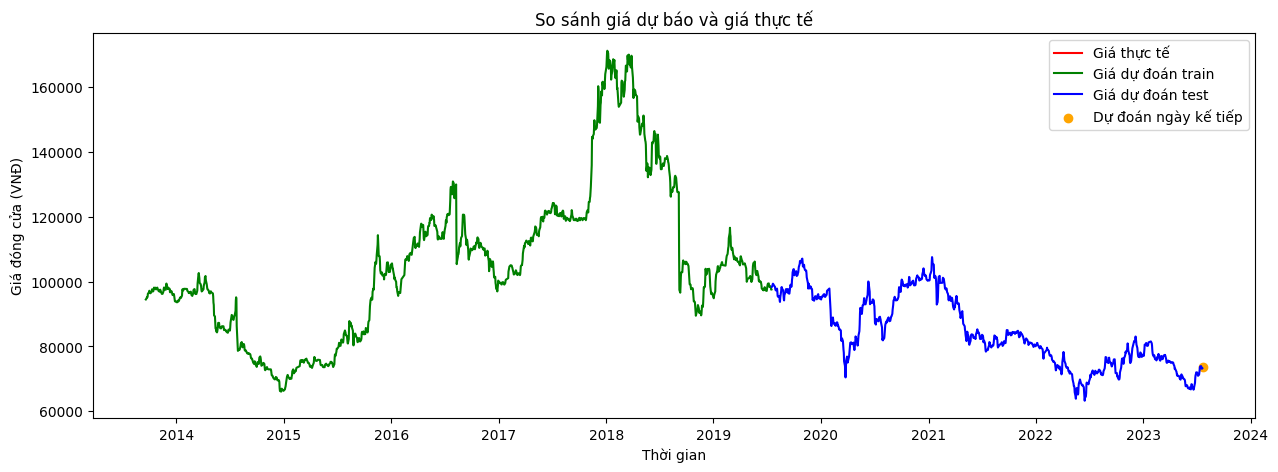

In [ ]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Đóng cửa'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Đóng cửa': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1['Ngày'], df1['Đóng cửa'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()

In [ ]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Đóng cửa'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]],
                              'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)

        Ngày   Giá dự đoán  Giá ngày trước
0 2023-07-22  73714.789062         73500.0
